# Importaciones

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.optimizers import SGD
from tensorflow import keras

# Lectura archivos y variables

In [ ]:
dataframe = pd.read_csv('house_price.csv')

In [ ]:
dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


# Analisis

In [ ]:
dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Pearson

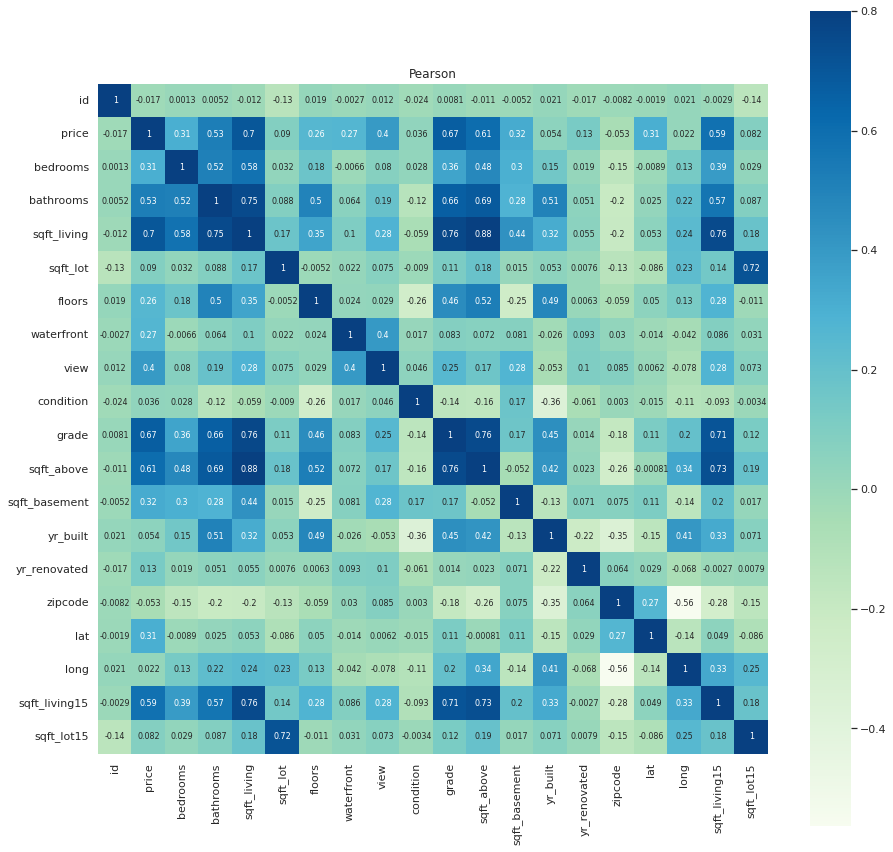

In [ ]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Pearson')
sns.heatmap(dataframe.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True,annot_kws={'size':8})

# Limpieza

In [ ]:
#Variables a quitar: zipcode, lat, long, sqft_lot15, sqft_lot
dataframe = dataframe.drop('zipcode',axis=1)
dataframe = dataframe.drop('lat',axis=1)
dataframe = dataframe.drop('long',axis=1)
dataframe = dataframe.drop('sqft_lot15',axis=1)
dataframe = dataframe.drop('sqft_lot',axis=1)
dataframe = dataframe.drop('id',axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f461e2d1e90>,
      dtype=object)

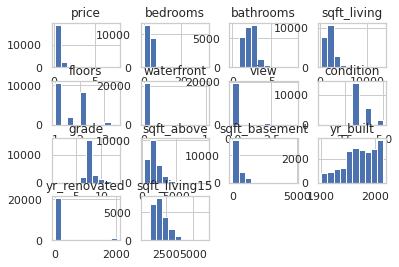

In [ ]:
dataframe.hist()

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  sqft_living15  21613 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.5+ MB


In [ ]:
dataframe['date'] = pd.to_datetime(dataframe['date'])
dataframe['month'] = dataframe['date'].apply(lambda date:date.month)
dataframe['year'] = dataframe['date'].apply(lambda date:date.year)
dataframe = dataframe.drop('date',axis=1)

In [ ]:
dataframe

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,month,year
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1180.0,0,1955,0,1340,10,2014
1,538000.0,3,2.25,2570,2.0,0,0,3,7,2170.0,400,1951,1991,1690,12,2014
2,180000.0,2,1.00,770,1.0,0,0,3,6,770.0,0,1933,0,2720,2,2015
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1050.0,910,1965,0,1360,12,2014
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1680.0,0,1987,0,1800,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8,1530.0,0,2009,0,1530,5,2014
21609,400000.0,4,2.50,2310,2.0,0,0,3,8,2310.0,0,2014,0,1830,2,2015
21610,402101.0,2,0.75,1020,2.0,0,0,3,7,1020.0,0,2009,0,1020,6,2014
21611,400000.0,3,2.50,1600,2.0,0,0,3,8,1600.0,0,2004,0,1410,1,2015


In [ ]:
dataframe.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
month            0
year             0
dtype: int64

In [ ]:
dataframe = dataframe.fillna(dataframe.mean())

In [ ]:
dataframe.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
month            0
year             0
dtype: int64

In [ ]:
x = dataframe.drop('price',axis=1)
y = dataframe['price']

In [ ]:
x

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,month,year
0,3,1.00,1180,1.0,0,0,3,7,1180.0,0,1955,0,1340,10,2014
1,3,2.25,2570,2.0,0,0,3,7,2170.0,400,1951,1991,1690,12,2014
2,2,1.00,770,1.0,0,0,3,6,770.0,0,1933,0,2720,2,2015
3,4,3.00,1960,1.0,0,0,5,7,1050.0,910,1965,0,1360,12,2014
4,3,2.00,1680,1.0,0,0,3,8,1680.0,0,1987,0,1800,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,3,8,1530.0,0,2009,0,1530,5,2014
21609,4,2.50,2310,2.0,0,0,3,8,2310.0,0,2014,0,1830,2,2015
21610,2,0.75,1020,2.0,0,0,3,7,1020.0,0,2009,0,1020,6,2014
21611,3,2.50,1600,2.0,0,0,3,8,1600.0,0,2004,0,1410,1,2015


In [ ]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(x)
x = minmaxscaler.transform(x)

In [ ]:
x

array([[0.09090909, 0.125     , 0.06716981, ..., 0.16193426, 0.81818182,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.22216486, 1.        ,
        0.        ],
       [0.06060606, 0.125     , 0.03622642, ..., 0.3994149 , 0.09090909,
        1.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.10686629, 0.45454545,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.17398038, 0.        ,
        1.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.10686629, 0.81818182,
        0.        ]])

# Entrenamiento y Testeo

In [ ]:
#X #Y
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=50, test_size=0.30)

In [ ]:
ann = Sequential()
ann.add(Dense(14,activation='relu'))
ann.add(Dense(7,activation='relu'))
#ann.add(Dense(3,activation='relu'))
ann.add(Dense(1))
#sgd = SGD(lr = 0.02, momentum=0.7)
ann.compile(optimizer='adam',loss='mse') 
#Categorical_crossentropy
#rmsprop adam sgd
#categorical_crossentropy binary_crossentropy metrics='accuracy'

In [ ]:
ann.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),batch_size=100,epochs=350, verbose=1)

Epoch 1/350
152/152 [==============================] - 1s 4ms/step - loss: 423761149952.0000 - val_loss: 432787947520.0000
Epoch 2/350
152/152 [==============================] - 0s 3ms/step - loss: 423747387392.0000 - val_loss: 432758292480.0000
Epoch 3/350
152/152 [==============================] - 0s 3ms/step - loss: 423691485184.0000 - val_loss: 432669261824.0000
Epoch 4/350
152/152 [==============================] - 1s 3ms/step - loss: 423559299072.0000 - val_loss: 432483205120.0000
Epoch 5/350
152/152 [==============================] - 0s 3ms/step - loss: 423312064512.0000 - val_loss: 432166502400.0000
Epoch 6/350
152/152 [==============================] - 0s 3ms/step - loss: 422926057472.0000 - val_loss: 431699886080.0000
Epoch 7/350
152/152 [==============================] - 0s 3ms/step - loss: 422382534656.0000 - val_loss: 431065825280.0000
Epoch 8/350
152/152 [==============================] - 0s 3ms/step - loss: 421666684928.0000 - val_loss: 430250524672.0000
Epoch 9/350
152/

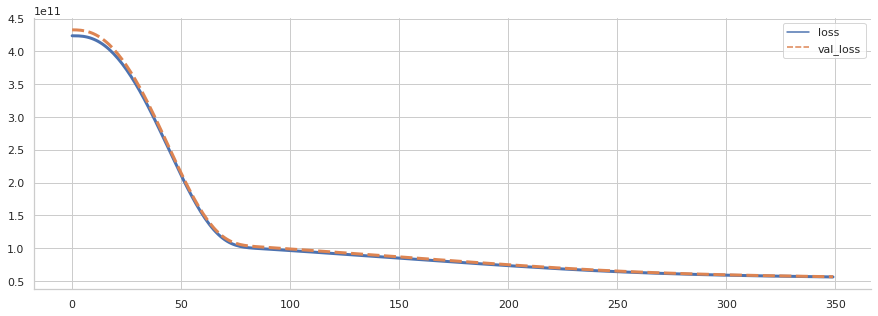

In [ ]:
loss = pd.DataFrame(ann.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss, lw=3)
sns.despine()

In [ ]:
y_pred = ann.predict(x_test)
print(mean_absolute_error(y_test, y_pred))

152675.22291635672


In [ ]:
casa0 = dataframe.drop('price',axis=1).iloc[0]
print(casa0, 'Precio:',dataframe.iloc[0]['price'])
#print(ann.predict(casa0))

bedrooms            3.0
bathrooms           1.0
sqft_living      1180.0
floors              1.0
waterfront          0.0
view                0.0
condition           3.0
grade               7.0
sqft_above       1180.0
sqft_basement       0.0
yr_built         1955.0
yr_renovated        0.0
sqft_living15    1340.0
month              10.0
year             2014.0
Name: 0, dtype: float64 Precio: 221900.0


In [ ]:
casa0 = minmaxscaler.transform(casa0.values.reshape(-1,15))
print(ann.predict(casa0))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


[[248922.58]]


In [ ]:
ann.save('annPrecingHouses.h5')

In [ ]:

modeloann = keras.models.load_model('annPrecingHouses.h5')